<h2><center> Welcome to the Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Modelling](#Modelling)

<a name="Libraries"></a>
## 1. Importing Libraries


In [1]:
#!pip install auto-sklearn

In [2]:
#!pip install h2o

In [3]:
#!pip install tpot

In [31]:
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import *
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px

<a name="Data"></a>
## 2. Loading Data

In [5]:
pwd

'C:\\Users\\DELL\\Downloads'

In [6]:
# Load files
train = pd.read_csv('cryptotrain.csv')
test = pd.read_csv('cryptotest.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

# Preview train dataset
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [7]:
# Preview test dataset
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [8]:
# Preview sample submission file
samplesubmission.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,0
3,ID_DNQXNVTXHE,0
4,ID_8CRTF1BJOD,0


In [9]:
samplesubmission['Target'].unique()

array([0], dtype=int64)

In [10]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

<a name="Statistics"></a>
## 3. Statistical Summaries

In [11]:
# Train statistical summary
train.describe(include = 'all')

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4W8AP96UO6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000


In [12]:
train.drop(columns= ['ID'], axis=1, inplace = True)


<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [13]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [14]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(True, False)

There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

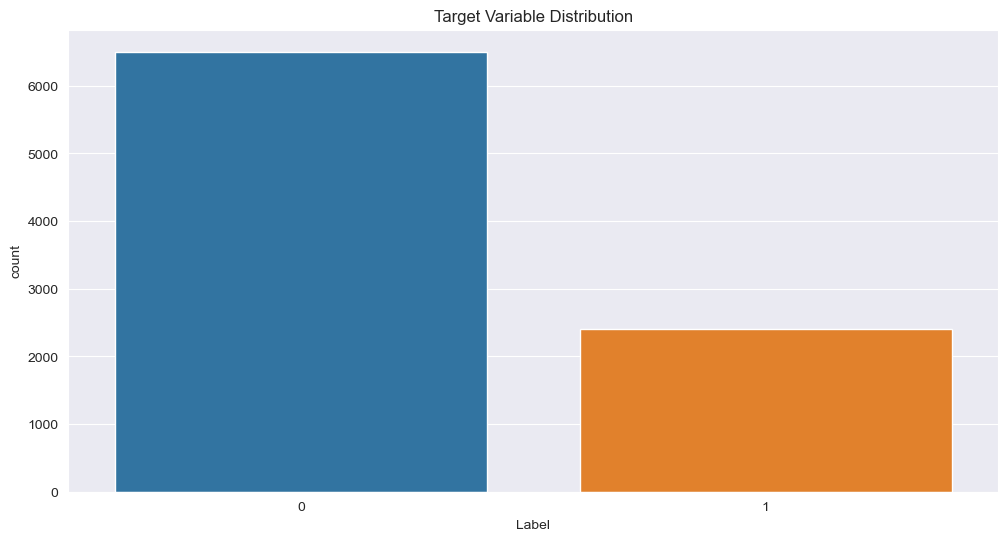

In [15]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

There is a class imbalance in our dataset

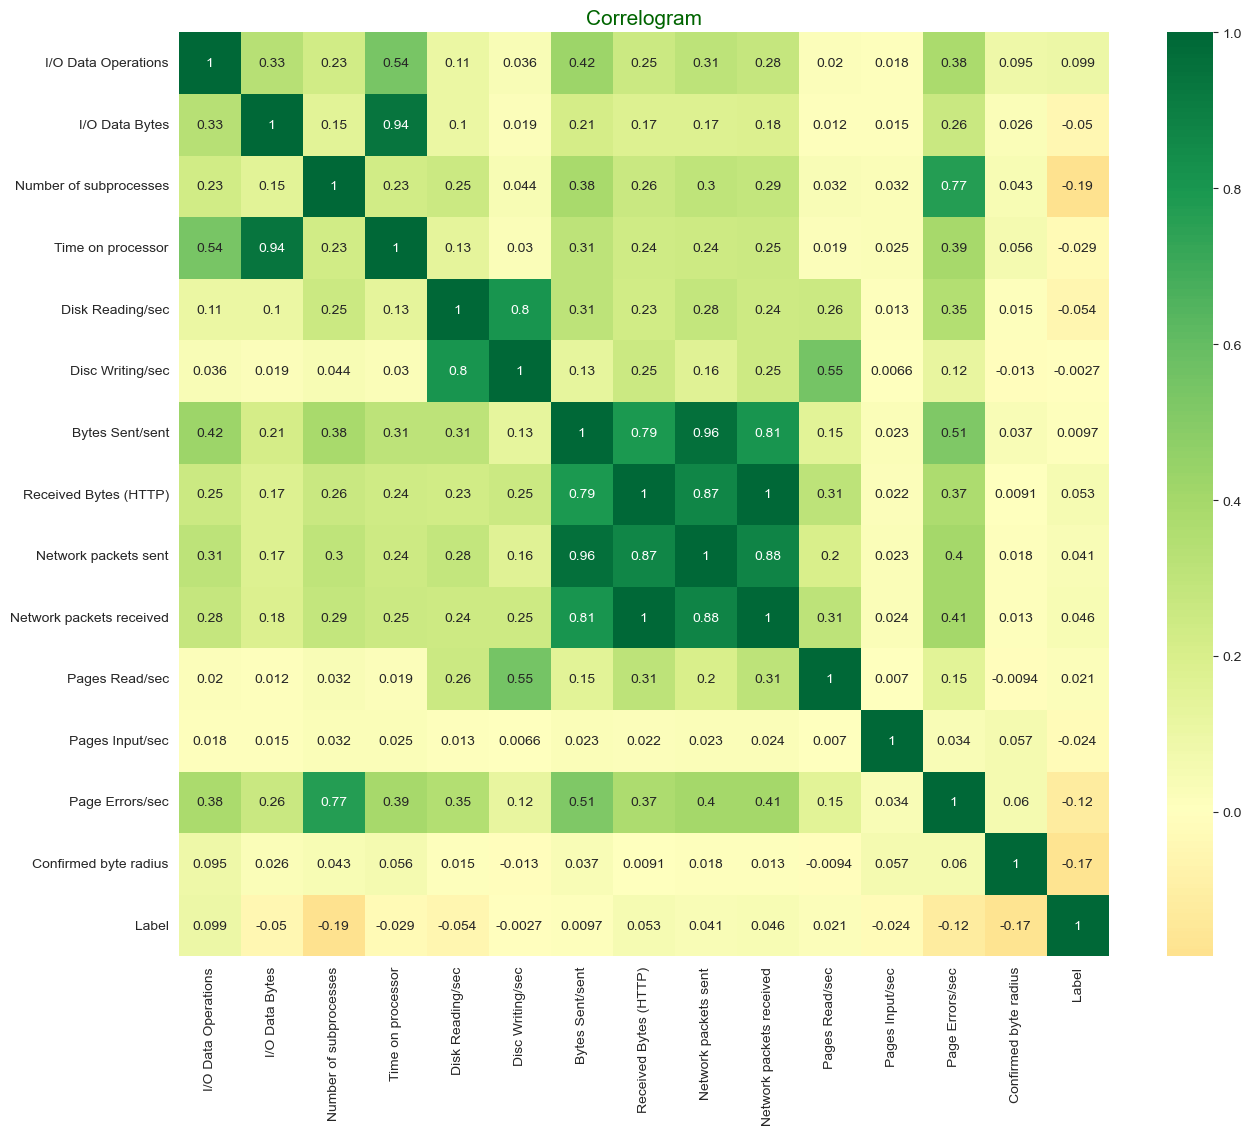

In [16]:
# Plotting a heatmap to show correlations between variables
corr = train.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Most features are not strongly correlated with the target

### Spliting Data 

In [17]:
# Training data
y = train["Label"]
X = train.drop(columns = ["Label"])

In [18]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Label, dtype: int64

In [19]:
X.head()Making a copy of the training data and checking the shape
oversampling_data = train_data.copy()
"No Crptohacking", "Cryptohacking = oversampling_data["Label"].value_counts()
"No Crptohacking", "Cryptohacking"

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843
1,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941
2,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287
3,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404
4,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889


### Balancing Dataset(Smote Balancing)

In [20]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    6504
0    6504
Name: Label, dtype: int64

In [21]:
X_train, X_test,y_train,y_test = train_test_split(X_sm, y_sm, test_size=0.2, 
                                                    random_state=15, stratify=y_sm)

In [22]:
X_train.shape,X_test.shape

((10406, 14), (2602, 14))

In [23]:
X_train.columns

Index(['I/O Data Operations', ' I/O Data Bytes', 'Number of subprocesses',
       'Time on processor', 'Disk Reading/sec', 'Disc Writing/sec',
       'Bytes Sent/sent', 'Received Bytes (HTTP)', 'Network packets sent',
       'Network packets received', 'Pages Read/sec', 'Pages Input/sec',
       'Page Errors/sec', 'Confirmed byte radius'],
      dtype='object')

<a name="Preprocess"></a>
## 6. Modeling

### Logistic Regression

In [24]:
#fit logistic regression model on rrain data
# Logistic Regression
log_reg = LogisticRegression(random_state = 20)
log_reg_model = log_reg.fit(X_train,y_train)

In [25]:
preds = log_reg.predict(X_test)
y_true = y_test

In [26]:
#check performance of the model
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.57      0.65      1301
           1       0.66      0.83      0.73      1301

    accuracy                           0.70      2602
   macro avg       0.71      0.70      0.69      2602
weighted avg       0.71      0.70      0.69      2602



### Random Forest

In [27]:
rf = RandomForestClassifier(random_state = 24)
rf = rf.fit(X_train,y_train)

In [28]:
rf_pred = rf.predict(X_test)
rf_true = y_test

In [29]:
#check performance of the model
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1301
           1       0.99      0.99      0.99      1301

    accuracy                           0.99      2602
   macro avg       0.99      0.99      0.99      2602
weighted avg       0.99      0.99      0.99      2602



In [34]:
## Feature Importance of the Random Forest Model
rf_importance = rf.feature_importances_
rf_importance = pd.DataFrame(rf_importance, columns = ["score"]).reset_index()
rf_importance["Feature"] = list(X.columns)
rf_importance.drop(columns = ["index"], inplace = True)
rf_importance.sort_values(by = "score", ascending = False, ignore_index = True, inplace = True)



## Visualizing the feature importances
fig = px.bar(rf_importance, x = "Feature", y = "score")
fig.show()
rfsmote_pred = rf

### Feature Importance

In [37]:
train.drop(columns= 'Pages Input/sec')

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Page Errors/sec,Confirmed byte radius,Label
0,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,1001.533430,27.190843,1
1,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,1089.121009,30.150941,0
2,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,322.464081,28.163287,0
3,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,12015.169690,34.204404,0
4,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,550.989619,31.466889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,26.769658,6965.281426,25.0,0.155955,1.497184,0.000000,252.525113,589.072219,0.858386,0.758573,0.019962,1177.825039,30.875026,1
8904,0.000000,0.000000,27.0,0.000000,0.400009,0.000000,28.089513,27.267273,0.400009,0.355563,0.000000,221.249363,23.503856,0
8905,0.866827,853.957842,29.0,0.000000,4.378587,0.000000,20.559356,26.093712,0.333395,0.355621,0.022226,262.270699,21.060478,0
8906,0.044430,16.527885,28.0,0.000000,0.888596,0.000000,74.375484,116.650437,0.555372,0.377653,0.000000,268.222697,24.775056,0


In [39]:
# Training data
ys = train["Label"]
Xs = train.drop(columns = ["Label"])

In [40]:
smote = SMOTE(sampling_strategy='minority')
X_sms, y_sms = smote.fit_resample(Xs, ys)

y_sms.value_counts()

1    6504
0    6504
Name: Label, dtype: int64

In [43]:
Xs_train, Xs_test,ys_train,ys_test = train_test_split(X_sms, y_sms, test_size=0.2, 
                                                    random_state=15, stratify=y_sms)

In [47]:
rfs = RandomForestClassifier(random_state = 24)
rfs = rfs.fit(Xs_train,ys_train)


rfs_pred = rfs.predict(Xs_test)
rfs_true = ys_test


#check performance of the model
print(classification_report(ys_test, rfs_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1301
           1       0.99      0.99      0.99      1301

    accuracy                           0.99      2602
   macro avg       0.99      0.99      0.99      2602
weighted avg       0.99      0.99      0.99      2602



### Hyperparameter Tuning

In [51]:
n_estimators = list(range(10, 101, 10))
# Defining the values and instantiating the grid to be used in the RandomizedSearch
random_grid = {
    "n_estimators": n_estimators,
    "max_depth": [1, 5, 10, 20, 50, 75, 100, 150, 200],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    "max_features": ["sqrt", "log2", None],
    "random_state": [24]
}


# Running the RandomizedSearch Cross-Validation with the grid
rfs_rscv = RandomizedSearchCV(estimator= rfs,
                             param_distributions= random_grid,
                             n_iter= 30,
                             cv= 10,
                             random_state= 24,
                             n_jobs= 5)
rfs_rscv.fit(Xs_train,ys_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=24),
                   n_iter=30, n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100],
                                        'random_state': [24]},
                   random_state=24)

In [53]:
# Looking at the best combination of hyperparameters for the model
best_params = rfs_rscv.best_params_
print("The best combination of hyperparameters for the model will be:")
for param_name in sorted(best_params.keys()):
    print(f"{param_name}: {best_params[param_name]}")

The best combination of hyperparameters for the model will be:
bootstrap: False
criterion: entropy
max_depth: 50
max_features: log2
n_estimators: 70
random_state: 24


In [55]:
# Defining the best version of the model with the best grid search parameters
best_gridrf_model = RandomForestClassifier(bootstrap =  'False',
                                       criterion= 'entropy',
                                       max_depth= 50,
                                       max_features= "log2",
                                       n_estimators= 70,
                                       random_state= 24)
                                      
# Fitting the model to the training data
best_gridrf_model = best_gridrf_model.fit(Xs_train,ys_train)

In [57]:
# Predicting the test data
best_gridrf_pred = best_gridrf_model.predict(Xs_test)

# Evaluating the model
best_gridrf_report = classification_report(y_test, best_gridrf_pred, target_names=["No Crptohacking", "Cryptohacking"])
print(best_gridrf_report)

                 precision    recall  f1-score   support

No Crptohacking       0.98      0.99      0.99      1301
  Cryptohacking       0.99      0.98      0.99      1301

       accuracy                           0.99      2602
      macro avg       0.99      0.99      0.99      2602
   weighted avg       0.99      0.99      0.99      2602



###  Prediction

In [58]:
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [60]:
Xs = test.drop(columns = ["ID"])

In [61]:
#make predictions on test set
test['Target'] = best_gridrf_model.predict(Xs)

In [62]:
sub = test[['ID','Target']]

In [63]:
sub.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,1
3,ID_DNQXNVTXHE,1
4,ID_8CRTF1BJOD,0


In [64]:
sub.to_csv('first_submission_crypto2.csv', index=False)